In [2]:
import matplotlib
import sys
import gc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import FormatStrFormatter

# Para manejar los archivos y automatizar la lectura en directorios
import csv
import os
# Fontsize
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
# Latex font
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
%matplotlib inline

# Nombres de archivo, paths y definiciones

In [3]:
# SOME DEFINITIONS
# Level of the simulation ('_' for filename format)
lvl = 'Level 4/level4_'
# number of halos
nhalos = 30 

'''# level of the simulation
lvl = 'Level 3/level3_'
# number of halos
nhalos = 6''' 

# FOLDER CONTAINING ALL FILES
folder = '../Data/Halo_General/'

# FILENAMES
# Contains parameters of the disk (MHD)
fn_params = lvl+'params'+'.csv'
# Triaxial eigensystem different radii (MHD & DM) using volumetric (mean) density: Allgood et al.
fn_axes = lvl+'axes'+'.csv' # Axes = axial ratios (sqrt of eigenvals)
fn_vecs = lvl+'vecs'+'.csv' # Vecs = principal axes directions

# Definicion de funciones

In [4]:
# Reads file in "path/filename"
# Returns data as a numpy array
# Returns filenames as a list of strings
# Returns headers as an array of strings

def read_csv(filename,skip_header=1):

    # Removes quotations from file (little writing error) 
    os.system('sed -i \'s/"//g\' '+filename) 
    
    # FILENAMES!
    headers = []
    with open( filename , 'r') as myfile:
        rd = csv.reader(myfile)
        headers = next(rd) # gets only first line 
    
    data = np.genfromtxt(filename, delimiter = ',', skip_header=skip_header, dtype=float )
    
    return headers,data


# Obteniendo los datos

In [5]:
# Obtiene el contenido del archivo de semiejes
headers,axes = read_csv(folder+fn_axes)
print(headers)
# Obtiene el contenido del archivo de vctores propios asociados
headers,vecs = read_csv(folder+fn_vecs)

['a12', 'b12', 'c12', 'a25', 'b25', 'c25', 'a50', 'b50', 'c50', 'a1', 'b1', 'c1', 'aDisk', 'bDisk', 'cDisk']


### Formato de archivo
\n
<font size=3>
En el archivo de semiejes, la primera letra es el semieje correspondiente $a>b>c$
Los caracteres consecutivos indican el radio en el que fue caracterizada la forma:
</font>

*  $12 \equiv 12.5\%\ R_{vir}$ 
*  $25 \equiv 25\%\ R_{vir}$ 
*  $50 \equiv 50\%\ R_{vir}$ 
*  $Disk \equiv Sampleado\ en\ el\ disco\ estelar$ 

\
<font size=3>
Adicionalmente, en terminos de filas, el archivo muestra los ejes de los halos MHD y DM intercalados de la siguiente manera:
</font>

*  --------Header------------
*  ----Info Halo1 MHD----
*  ----Info Halo1  DM------
*  ----Info Halo2 MHD----
*  ----Info Halo2  DM------
*        -------------...--------------

\

<font size=3>
Para el archivo de vectores de ejes principales el formato sigue la misma logica
</font>


In [6]:
# Dado el formato del archivo explicado anteriormente
# Se obtienen los resultados en terminos de arrays

# RADII SAMPLED
rad_sampl = ['12.5%Rvir'
            ,'25%Rvir'
            ,'50%Rvir'
            ,'100%Rvir'
            ,'Stellar Disk']

# AXES
axes = np.reshape(axes,(2*nhalos,5,3)) # contains DM and MHD (2*nhalos) axes (3) sampled at (5) radii
axesMHD = axes[::2] #organized halo1MHD,halo1DM,halo2MHD,halo2DM....
axesDM = axes[1::2]

# indices > haloid, rad_sampled, axis id

# VECS
vecs = np.reshape(vecs,(2*nhalos,5,3,3)) # contains DM and MHD (2*nhalos) vecs (3,3) sampled at (5) radii
vecsMHD = vecs[::2]
vecsDM = vecs[1::2]

# indices > haloid, rad_sampled, axis id, vector component

# Estudio de alineamiento 
## DM at 100%Rvir Principal axis Vs Star Disk Principal axis

In [7]:
# Obtiene los vectores del eje principal (0) 
# sampleados en 100Rvir (-2)
vecs_100Rvir = vecsMHD[:,-2,0,:]
vecs_inner = vecsMHD[:,0,0,:]
vecs_stardisk = vecsMHD[:,-1,0,:]

# Producto punto para cada halo
dot_pr = np.abs(np.diag(vecs_100Rvir@vecs_stardisk.T))

/Users/forero/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


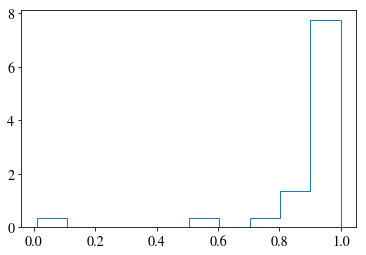

In [8]:
# Histograma
n, bins, patches = plt.hist(dot_pr,normed=True, histtype = 'step')
plt.show()

(0, 1)

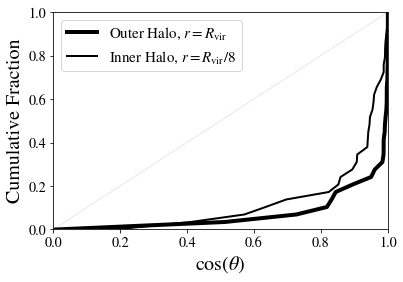

In [21]:
# Producto punto para cada halo
dot_pr_out = np.abs(np.diag(vecs_100Rvir@vecs_stardisk.T))
dot_pr_in = np.abs(np.diag(vecs_inner@vecs_stardisk.T))

fig,ax = plt.subplots()
# cumulative histogram.
#plt.hist(dot_pr, bins=bins, normed=True, histtype='stepfilled', cumulative=1,
#        label='Cummulative',alpha = 0.5)
plt.plot(np.sort(dot_pr_out), np.linspace(.0, 1.0, len(dot_pr_out)), 
         label=r'Outer Halo, $r=R_{\rm vir}$', linewidth=4, color='black')
plt.plot(np.sort(dot_pr_in), np.linspace(.0, 1.0, len(dot_pr_in)), 
         label=r'Inner Halo, $r=R_{\rm vir}/8$', linewidth=2, color='black')
plt.plot([0,1],[0,1],c ='darkred', linewidth=0.1)
plt.legend(fontsize=15)
plt.ylabel(r'Cumulative Fraction',fontsize = 20)
plt.xlabel(r'$\cos(\theta)$',fontsize = 20)
plt.savefig('../Graphs/Star_Disk_Alignment/Cummulative_Alignment_Histogram.pdf',bbox_tight=True)
plt.xlim([0,1])
plt.ylim([0,1])


/Users/forero/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


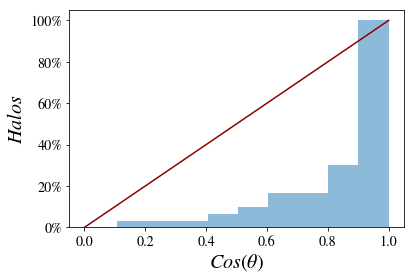

In [10]:
# Producto punto para cada halo
dot_pr = np.abs(np.diag(vecs_inner@vecs_stardisk.T))

fig,ax = plt.subplots()
# cumulative histogram.
plt.hist(dot_pr, bins=bins, normed=True, histtype='stepfilled', cumulative=1,
        label='Cummulative',alpha = 0.5)
plt.plot([0,1],[0,1],c ='darkred')
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
plt.ylabel(r'$Halos$',fontsize = 20)
plt.xlabel(r'$Cos(\theta)$',fontsize = 20)
plt.savefig('../Graphs/Star_Disk_Alignment/Cummulative_Alignment_Histogram_Rvir_16.png',dp1=500)
plt.show()